In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
drop = ['Name', 'Ticket', 'Cabin']
train['Sex'] = train['Sex'].replace({'male':0, 'female':1})


C:\Users\Rosha\AppData\Local\Temp\ipykernel_17424\1327485014.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'male':0, 'female':1})


In [6]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [7]:
train.Embarked = train.Embarked.replace({'S': 0, 'C':1, 'Q':2})

C:\Users\Rosha\AppData\Local\Temp\ipykernel_17424\4090572236.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.Embarked = train.Embarked.replace({'S': 0, 'C':1, 'Q':2})


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [9]:
train['Survived'].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
 train.drop(columns = drop, inplace = True)
corr =train.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030555
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


<Axes: >

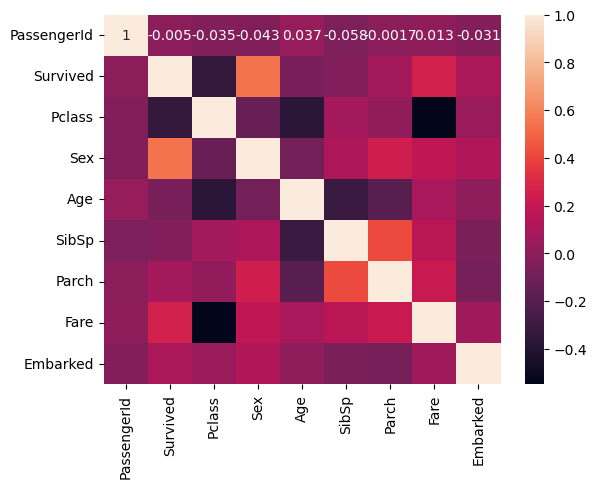

In [12]:
sns.heatmap(corr, annot = True)

In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [14]:
avg_age = train['Age'].mean()
train['Age'].replace({np.nan: avg_age}, inplace = True)
emb = train.Embarked.mean()
train.Embarked.replace({np.nan: emb}, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_17424\1872782493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].replace({np.nan: avg_age}, inplace = True)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_17424\1872782493.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [15]:
X= train.drop(columns = 'Survived')
Y = train.Survived

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [18]:
penalty = 'l1'
solver = 'saga'
lr = LogisticRegression(random_state=123, penalty=penalty, solver= solver, max_iter=10000)

In [19]:
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)
print(len(yhat))
test

268


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
from sklearn.metrics import  accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support

In [21]:
accuracy_score(y_test, yhat)

0.7947761194029851

In [22]:
precision, recall, f1score, support = precision_recall_fscore_support(y_test, yhat)
print(f"Precision:{precision}\n Recall:{recall}\nf1score:{f1score}\n Support:{support}")

Precision:[0.78606965 0.82089552]
 Recall:[0.92941176 0.56122449]
f1score:[0.85175202 0.66666667]
 Support:[170  98]


In [23]:
cf = confusion_matrix(y_test, yhat)

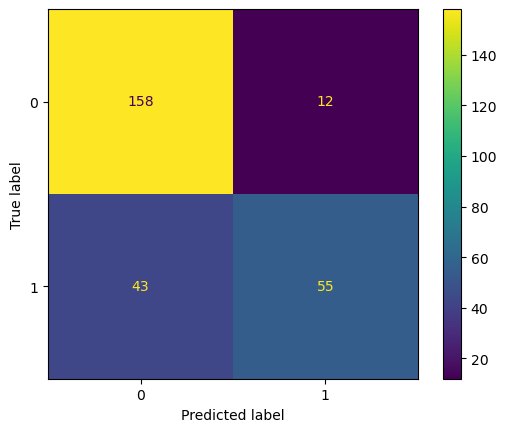

In [24]:
disp = ConfusionMatrixDisplay(cf)
disp.plot()

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [26]:
test['Sex'] = test['Sex'].replace({'male':0, 'female':1})
test.Embarked = test.Embarked.replace({'S': 0, 'C':1, 'Q':2})

C:\Users\Rosha\AppData\Local\Temp\ipykernel_17424\2499300719.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace({'male':0, 'female':1})
C:\Users\Rosha\AppData\Local\Temp\ipykernel_17424\2499300719.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.Embarked = test.Embarked.replace({'S': 0, 'C':1, 'Q':2})


In [27]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
test.drop(columns = drop, inplace = True)

In [29]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [30]:
test.Fare

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [31]:
avg_age = test.Age.mean()
test.Age.replace({np.nan:avg_age}, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_17424\805903745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Age.replace({np.nan:avg_age}, inplace = True)


In [32]:
avg_fare = test.Fare.mean()

In [33]:
test.Fare.replace({np.nan:avg_fare}, inplace = True)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.50000,0,0,7.8292,2
1,893,3,1,47.00000,1,0,7.0000,0
2,894,2,0,62.00000,0,0,9.6875,2
3,895,3,0,27.00000,0,0,8.6625,0
4,896,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,0
414,1306,1,1,39.00000,0,0,108.9000,1
415,1307,3,0,38.50000,0,0,7.2500,0
416,1308,3,0,30.27259,0,0,8.0500,0


In [34]:
y_hat = lr.predict(test)
len(y_hat)

418

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [37]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
yhat_dtc_train = dtc.predict(x_test)

In [39]:
accuracy_score(yhat_dtc_train, y_test)
precision_recall_fscore_support(yhat_dtc_train, y_test)

(array([0.76470588, 0.73469388]),
 array([0.83333333, 0.64285714]),
 array([0.79754601, 0.68571429]),
 array([156, 112], dtype=int64))

In [40]:
yhat_dtc_test = dtc.predict(test)

In [41]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 50, 100],
    'min_samples_leaf':[1, 2, 5, 10]
}

In [42]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = dtc, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
gs.fit(x_train, y_train)
yhat = gs.predict(x_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [43]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

In [44]:
precision_recall_fscore_support(yhat, y_test)

(array([0.90588235, 0.69387755]),
 array([0.83695652, 0.80952381]),
 array([0.8700565 , 0.74725275]),
 array([184,  84], dtype=int64))

In [45]:
accuracy_score(yhat, y_test)

0.8283582089552238

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [47]:
svc_yhat = svc.predict(x_test)

In [48]:
precision_recall_fscore_support(y_test, svc_yhat)

(array([0.6459144 , 0.63636364]),
 array([0.97647059, 0.07142857]),
 array([0.77751756, 0.12844037]),
 array([170,  98], dtype=int64))

In [49]:
accuracy_score(y_test, svc_yhat)

0.6455223880597015

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
knn_yhat = knn.predict(x_test)

In [105]:
precision_recall_fscore_support(knn_yhat, y_test)

(array([0.91764706, 0.29591837]),
 array([0.69333333, 0.6744186 ]),
 array([0.78987342, 0.41134752]),
 array([225,  43], dtype=int64))

In [106]:
accuracy_score(knn_yhat, y_test)

0.6902985074626866

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.5,
    max_depth=5, random_state=0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.5, max_depth=5, random_state=0)

In [173]:
gbc_yhat = gbc.predict(x_test)

In [174]:
accuracy_score(y_test, gbc_yhat)

0.8283582089552238

In [175]:
test_f = pd.DataFrame({'PassengerID' : test['PassengerId'], 'Survived' : y_hat})
test_f.to_csv('Dataset/train_f.csv', index= False)